<a href="https://colab.research.google.com/github/edakavlakoglu/mids/blob/master/Eda_Kavlakoglu_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Digit Classification Naive Bayes

**Solution**

# Intro
---
In this project, you'll continue working on your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b>


## Grading
---
 - Make sure to answer every part in every question.
 - There are 6 questions, each equally weighted and an additional bonus question.
 - The extra credit question will be graded based on your attempts at feature engineering and resulting improved accuracy.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean, well commented,
  -  if the functions or answers are too long.

## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

## Additional Reading and notes
---
If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [ ]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Applying a smoothing using numpy.
---

A common image processing technique is to smooth an image by **blurring**. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

1. Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.
1. Choose some weights as a starting point. Produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
  1. Do not use the filter
  1. Filter the training data but not the dev data
  1. Filter the dev data but not the training data
  1. Filter both training data and dev data
1. Show the accuracies of the four models evaluated as described. What do you see? Can you explain why this is?
1. Experiment with weights that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* A good trick to simplify your code is to use numpy's pad function to add 0s around your original array so you don't have to deal with "edge cases".
* In addition, you can use numpy to multiply and sum slices of two arrays.
* [This notebook](https://colab.research.google.com/drive/1eJXTQLtREXQjQIsLOA9uCrBl6B049-pO) might help shows some example numpy code.
* In general, [numpy operations will be much faster than for loops](https://colab.research.google.com/drive/1KJI4JtuIqVdyZHTTe_mAlKYA5XdLFp3_). 
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but in this question, please implement your own.

In [ ]:
#CREDIT TO SOURCES#
#https://colab.research.google.com/drive/1eJXTQLtREXQjQIsLOA9uCrBl6B049-pO#scrollTo=XeP0UCf-L4bt
#https://stackoverflow.com/questions/44982157/a-kernel-matrix-3x3-on-an-array-of-an-image-gaussian-filter
#https://stackoverflow.com/questions/8204645/implementing-gaussian-blur-how-to-calculate-convolution-matrix-kernel
#https://www.py4u.net/discuss/183648
#https://stackoverflow.com/questions/44145948/numpy-padding-array-with-zeros
#https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

def Q1():

  scores_list = []

  #model 1 - no filter 
  model_1 = KNeighborsClassifier(n_neighbors=1) 
  model_1.fit(mini_train_data, mini_train_labels) 
  train_predicted_labels = model_1.predict(dev_data) 
  score_1 = model_1.score(dev_data, dev_labels)
  scores_list.append(score_1)

  #gaussian filter the training data
  def gauss_filter(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    gaussian = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    filter = gaussian/gaussian.sum()
    return filter

  filter = gauss_filter(3, 1)

  #create new variables for padding exercise
  training_data = mini_train_data
  training_data = training_data.reshape(-1, 28, 28)

  #empty lists for padded data
  reshaped_td = [] 
  reshaped_dd = [] 

  #add padding to training data
  for x in training_data:
    img = np.pad(x, pad_width=1)
    reshaped_td.append(img)

  #add padding to dev data
  devlpmnt_data = dev_data
  devlpmnt_data = devlpmnt_data.reshape(-1, 28, 28)

  #add padding to training data
  for x in devlpmnt_data:
    img = np.pad(x, pad_width=1)
    reshaped_dd.append(img)

  #convert lists to an array
  reshaped_td = np.array(reshaped_td)
  reshaped_dd = np.array(reshaped_dd)

  #check shape
  # print(reshaped_td.shape) 
  # print(reshaped_dd.shape) 

  #create empty array for training data
  filtered_training_data = np.zeros((reshaped_td.shape))
  (z, x, y) = np.shape(filtered_training_data)

  #create empty array for dev data
  filtered_dev_data = np.zeros((reshaped_dd.shape))
  (c, a , b) = np.shape(filtered_dev_data)
  
  #filter the training data
  for index in range(len(filtered_training_data)):
    for row in range(1, x-1 ):
      for col in range(1, y-1):
          filtered_training_data[index][row, col] = np.sum(reshaped_td[index][row-1:row+2, col-1:col+2] * filter)
          
  #convert images back to 1D
  filtered_training_data = filtered_training_data.flatten().reshape(1000, 900)
  padded_dev_data = reshaped_dd.flatten().reshape(1000, 900)

  #filter the dev data
  for index in range(len(filtered_dev_data)):
    for row in range(1, a-1):
      for col in range(1, b-1):
          filtered_dev_data[index][row, col] = np.sum(reshaped_dd[index][row-1:row+2, col-1:col+2] * filter)

  #convert images back to 1D
  filtered_dev_data = filtered_dev_data.flatten().reshape(1000, 900)
  padded_train_data = reshaped_td.flatten().reshape(1000, 900)
  
  #model 2 - filter training data, not dev data
  model_2 = KNeighborsClassifier(n_neighbors=1) 
  model_2.fit(filtered_training_data, mini_train_labels) 
  train_predicted_labels = model_2.predict(padded_dev_data) 
  score_2 = model_2.score(padded_dev_data, dev_labels )
  scores_list.append(score_2)

  #model 3 - unfiltered training data, filtered dev data
  model_3 = KNeighborsClassifier(n_neighbors=1) 
  model_3.fit(padded_train_data, mini_train_labels) 
  train_predicted_labels = model_3.predict(filtered_dev_data) 
  score_3 = model_3.score(filtered_dev_data, dev_labels)
  scores_list.append(score_3)

  #model 4 - filtered training data, filtered dev data
  model_4 = KNeighborsClassifier(n_neighbors=1) 
  model_4.fit(filtered_training_data, mini_train_labels) 
  train_predicted_labels = model_4.predict(filtered_dev_data) 
  score_4 = model_4.score(filtered_dev_data, dev_labels)
  scores_list.append(score_4)

  for x in range(len(scores_list)):
    print("Model", x+1, "has an accuracy score of ", "{:.2%}".format(scores_list[x]))
Q1()

Model 1 has an accuracy score of  88.40%
Model 2 has an accuracy score of  90.60%
Model 3 has an accuracy score of  86.80%
Model 4 has an accuracy score of  90.10%


**Answer:** The accuracy of the above models makes sense to me. The two models with the highest accuracies are where the training data has been blurred. Blurring or smoothing reduces the noise and fine details in the data, allowing the model to better generalize to new data. Model 3 is the least accurate because the smoothing has only been applied to the dev data, and the model is fitting more closely to the finer details within the training images. 

### Question 2: Modeling your data and experimenting with different Naive Bayes models. 
---

1. Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.
  1. For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.
  1. For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Here you'll likely need to implement a `trianarize` helper function. Since we are going beyond the binary representation of our features, you should use `MultinomialNB` to produce the model.
1. Show the Bernoulli model accuracy and the Multinomial model accuracy.
1. Does the multinomial version improve the results? Why or why not?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.



In [ ]:
# Solution with binarization by explicit binarize function
#CREDIT TO SOURCES#
#https://github.com/MIDS-W207/ramesh-coursework/blob/main/LiveSessions/week03/Naive_Bayes.ipynb

def trinarize(data, thresholds=[0.1, 0.9]):
  
  #Initialize a new feature array with the same shape as the original data
  trinarized_data = np.zeros(data.shape)
  (z, x) = np.shape(trinarized_data)   
  trinarized_data[(data < thresholds[0])] = 0 
  trinarized_data[(data > thresholds[1])] = 2
  trinarized_data[(data > thresholds[0]) & (data < thresholds[1] )] = 1
  return trinarized_data 

def Q2():

  model_1 = BernoulliNB(binarize=0.1)
  model_1.fit(mini_train_data, mini_train_labels)
  score_1 = model_1.score(dev_data, dev_labels)
  print("The Bernoulli Naive Bayes model has an accuracy score of", "{:.1%}".format(score_1))

  reshaped_mini_train_data = mini_train_data.reshape(-1,392,2)
  t_mini_train_data = trinarize(mini_train_data, thresholds=[0.1, 0.9])
  model_2 = MultinomialNB()
  model_2.fit(t_mini_train_data, mini_train_labels)
  score_2 = model_2.score(dev_data, dev_labels)
  print("The Multinomial Naive Bayes model has an accuracy score of", "{:.1%}".format(score_2))

Q2()

The Bernoulli Naive Bayes model has an accuracy score of 81.4%
The Multinomial Naive Bayes model has an accuracy score of 80.7%


**ANSWER:** The Multinomial Naive Bayes model version does not improve the results, compared to the Bernoulli Naive Bayes model. The accuracies are fairly close across the two models, and I imagine that is due to the fact that they both leverage similar thresholds. 



### Question 3: Applying the grid search technique.
1. Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.
1. What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.



In [ ]:
#CREDIT TO SOURCES#
#https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-naive-bayes
#https://stackoverflow.com/questions/55539770/gridsearchcv-has-no-attribute-grid-grid-scores
#https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece
#https://medium.com/@akshayc123/naive-bayes-classifier-nb-7429a1bdb2c0

def Q3(alphas):
  
  #produce model using Bernoulli Naive Bayes w/ GridSearch
  bernoulli_nb_grid = GridSearchCV(BernoulliNB(binarize=0), param_grid=alphas, cv=5, scoring = 'accuracy') # iid parameter is deprecated 
  bernoulli_nb_grid.fit(mini_train_data, mini_train_labels)

  #loop through GridSearchCV Results to view accuracy score for each alpha
  for i in range(len(alphas['alpha'])):
    print("Alpha value:", alphas['alpha'][i], ", Accuracy Score:", "{:.1%}".format(bernoulli_nb_grid.cv_results_['mean_test_score'][i]))
      
  #print scores 
  print('\n')
  print("Training Accuracy :", "{:.1%}".format(bernoulli_nb_grid.best_estimator_.score(dev_data, dev_labels)))
  print("Best Accuracy Through Grid Search:", "{:.1%}".format(bernoulli_nb_grid.best_score_))
  print('Best Alpha Parameter : ', bernoulli_nb_grid.best_params_['alpha'])

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
Q3(alphas)


Alpha value: 1e-10 , Accuracy Score: 81.4%
Alpha value: 0.0001 , Accuracy Score: 81.9%
Alpha value: 0.001 , Accuracy Score: 82.5%
Alpha value: 0.01 , Accuracy Score: 82.2%
Alpha value: 0.1 , Accuracy Score: 81.8%
Alpha value: 0.5 , Accuracy Score: 81.3%
Alpha value: 1.0 , Accuracy Score: 80.9%
Alpha value: 2.0 , Accuracy Score: 80.5%
Alpha value: 10.0 , Accuracy Score: 78.3%


Training Accuracy : 82.3%
Best Accuracy Through Grid Search: 82.5%
Best Alpha Parameter :  0.001


**ANSWER:** The best value for alpha is 0.001, and the accuracy score around 0 is close to 81%. It makes sense that the accuracy of the model improves as the alpha value decreases since high alpha values tend to result in high bias within Naive Bayes. As the alpha value decreases, the probability distribution becomes less uniform. 

As the value gets even closer to zero, less smoothing is applied to the image, making it harder for the model to generalize to new data. While it makes sense that the accuracy decreases as alpha gets closer to zero, I expected the accuracy to be highest when alpha is equal to 1. 

### Question 4: Experimenting with Gaussian Naive Bayes
---
1. Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. 
1. Diagnose and explain the problem.
1. Apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. 
1. Show the model accuracy before your fix and the model accuracy after your fix.  
1. Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Take a look at var_smoothing argument for GaussianNB.
* Feel free to  examine theta and sigma to better understand what's happening. In general though, **it is not a good idea to mess with internal variables of the model**. These are stored in the model's `theta_` and `sigma_` attributes.

In [ ]:
#CREDIT TO SOURCES#
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-cross-validation-and-hyperparameter-tuning/
#https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo

def Q4():

  #produce model using Gaussian Naive Bayes
  model_GB = GaussianNB()
  model_GB.fit(mini_train_data, mini_train_labels)
  predicted_GB= model_GB.predict(dev_data) 
  score_GB = model_GB.score(dev_data, dev_labels)
  
  #print accuracy score
  print("Accuracy score for Gaussian Naive Bayes model:", "{:.1%}".format(score_GB))

  #produce model using Bernoulli Naive Bayes 
  model_NB = BernoulliNB()
  model_NB.fit(mini_train_data, mini_train_labels)
  predicted_NB= model_NB.predict(dev_data)
  score_NB = model_NB.score(dev_data, dev_labels)

  #print accuracy score to compare to GB
  print("Accuracy score for Bernoulli Naive Bayes model:", "{:.1%}".format(score_NB))

  #various var_smoothing parameters to test for model optimization
  parameters = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

  #use GridSearchCV to identify ideal var_smoothing parameter
  m_GB= GridSearchCV(model_GB, param_grid=parameters, scoring='accuracy')
  m_GB.fit(mini_train_data, mini_train_labels)
  m_GB.predict(dev_data) 
  m_score = m_GB.score(dev_data, dev_labels)
 
  #print outputs 
  print("The best var_smoothing parameter value is:", m_GB.best_params_['var_smoothing'])
  print("This var_smoothing parameter optimizes the Gaussian model to have an accuracy score of:", "{:.1%}".format(m_score))

Q4()

Accuracy score for Gaussian Naive Bayes model: 59.3%
Accuracy score for Bernoulli Naive Bayes model: 80.9%
The best var_smoothing parameter value is: 0.01
This var_smoothing parameter optimizes the Gaussian model to have an accuracy score of: 79.7%


**ANSWER:** Our training set doesn't follow a normal distribution which is why the Gaussian Naive Bayes classifier does not predict well. The var_smoothing hyperparameter allows the model to account for samples that are further from the mean. Using GridSearchCV, the ideal var_smoothing parameter was identified as 0.01, which improved the accuracy score from 59.3% to 79.7%. 

### Question 5: Naive Bayes as a generative model
---
Because Naive Bayes produces a generative model, you can use it to generate digit images.

1. Produce a Bernoulli Naive Bayes model and then use it to generate a 10x10 grid with 10 example images of each digit. Each pixel output will be either 0 or 1: randomly generating a number and then comparing it to the estimated probability of the pixel being either 0 or 1.  Show the grid.
1. How do the generated digit images compare to the training digit images?

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.



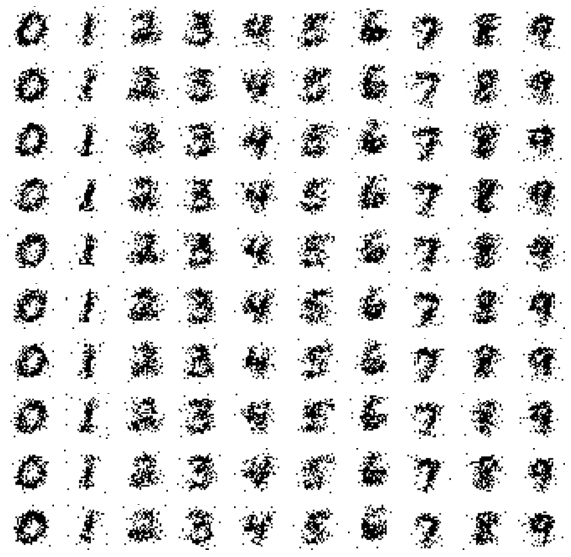

In [ ]:
#CREDIT TO SOURCES#
#https://python.plainenglish.io/three-ways-to-generate-images-with-python-86e39b15cd29

def Q5(num_examples):

  #produce model using Bernoulli Naive Bayes 
  model_NB_Q5 = BernoulliNB()
  model_NB_Q5.fit(mini_train_data, mini_train_labels)

  #check probabilities 
  #probabilities = np.exp(model_NB_Q5.feature_log_prob_)

  #generate images from predicted probabilities 
  def generate_image(pp):
    new_data = np.random.rand(784)
    pixel_output = np.zeros(pp.shape[0])
    for i in range(pp.shape[0]):
      if new_data[i] >= np.exp(pp[i]):
        pixel_output[i] = 1
    return pixel_output

  #plot 10 x 10 image grid
  fig, ax = plt.subplots(10, num_examples, sharex='all', sharey='all', figsize=(10, 10))
  for i in range(10):
      for j in range(num_examples):
        image = generate_image(model_NB_Q5.feature_log_prob_[j])
        reshaped_image = image.reshape(28, 28)
        ax[i, j].imshow(reshaped_image , cmap='gray')
        ax[j][i].axis("off") #remove axes

Q5(10)

**ANSWER:** The generated digit images do not have as much detail compared to the training digit images. You can more clearly distinguish a 6 in the training digit images vs. the generated digit images. 

### Question 6: Model Calibraiton
---
Recall that:
 * a **strongly calibrated** classifier is rougly 90% accurate when it says it is 90% accurate. The model's estimated posterior probability of the predicted class is indeed 0.9. 
 * A **weakly calibrated** classifier is more accurate when it "says" it is more accurate. The actual accuracy is higher when the model's estimated posterior probability is higher.
 * A **poorly calibrated** classifier has no positive correlation between the model's estimate posterior probability and the actual accuracy.

1. Produce a Bernoulli Naive Bayes model.  
1. Evaluate performance: 
  1. Partition the dev set into several buckets based on the estimated posterior probabilities of the predicted classes (predict_proba)
    - Think of it as a bin in a histogram, where each bin groups a range of estimated posterior probabilities of the predicted classes (predict_proba).
    - Then estimate the actual accuracy the classifier achieved for each bucket. 
    - So, for each prediction:
       - Find the bucket whose range includes the estimated posterior probability, 
       - and update "correct" and "total" counters accordingly. 
       - Show the accuracy for each bucket.
1. How would you characterize the calibration for this Bernoulli Naive Bayes model according to the definitions above?

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.



In [ ]:
#CREDIT TO SOURCES#
#https://stackoverflow.com/questions/53261196/numpy-find-the-max-value-in-a-row-and-return-back-to-its-column-index

def Q6(buckets, correct, total):
    
  #produce model using Bernoulli Naive Bayes 
  model_Q6 = BernoulliNB(binarize=0, alpha=0.001)
  model_Q6.fit(mini_train_data, mini_train_labels)

  #get probability estimates 
  pred_classes = model_Q6.predict_proba(dev_data)

  #find max probability in each row and its predicted label
  max_pred = np.amax(pred_classes, axis=1)
  pred_class_label = np.argmax(pred_classes, axis=1)

  #print(pred_class_label[0] == int(dev_labels[0]))

  #loop through each prediction
  for x in range(len(max_pred)):
    for i in range(len(buckets)):

      #evaluate if prediction is less than or equal to bucket value at index i; increment total at index i if true 
      if max_pred[x] <= buckets[i]:
        total[i] += 1

        #evaluate if predicted label equals the actual label; increment correct at index i if true
        if pred_class_label[x] == int(dev_labels[x]):
          correct[i] += 1
        
        #break loop if first conditional was met 
        break
 
  #determine accuracy for each bucket 
  accuracy = [0]

  for x in range(1, len(buckets)):
    a = round(correct[x]/total[x], 4) 
    accuracy.append(a)

  #print out values
  for x in range(len(buckets)):
    if x == 0: 
      print("Posterior probability <=", buckets[x], "has", total[x], "total values. This bucket has no accuracy score.")
    else:
      print("Posterior probability <=", buckets[x], "has", total[x], "total values. This bucket has an accuracy score of","{:.2%}".format(accuracy[x]))


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

Q6(buckets, correct, total)

Posterior probability <= 0.5 has 0 total values. This bucket has no accuracy score.
Posterior probability <= 0.9 has 31 total values. This bucket has an accuracy score of 35.48%
Posterior probability <= 0.999 has 67 total values. This bucket has an accuracy score of 43.28%
Posterior probability <= 0.99999 has 59 total values. This bucket has an accuracy score of 45.76%
Posterior probability <= 0.9999999 has 46 total values. This bucket has an accuracy score of 65.22%
Posterior probability <= 0.999999999 has 62 total values. This bucket has an accuracy score of 77.42%
Posterior probability <= 0.99999999999 has 33 total values. This bucket has an accuracy score of 78.79%
Posterior probability <= 0.9999999999999 has 43 total values. This bucket has an accuracy score of 79.07%
Posterior probability <= 1.0 has 659 total values. This bucket has an accuracy score of 93.78%


**ANSWER:** I would characterize the calibration for this model to be "weakly calibrated" as it is more accurate when the model's estimated posterior probability is higher. 

### Question 7 EXTRA CREDIT: Feature generation
---
1. Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.
1. Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

**Note that improving results is actually hard.**

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try implementing [*maxpool*](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) features, taking a rolling maximum over sub-regions of a the image. 
- In any case, you can either transform the original data or add new "features" to it.

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
def Q7():

### STUDENT START ###

### STUDENT END ###

Q7()